# Training for Full

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
#Define some parameters
batch_size = 32
num_classes = 10
epochs = 50
num_predictions = 20

In [6]:
#Load in the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
#Set up the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

W1103 20:38:34.921457 140342909486912 deprecation.py:506] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

historyFull = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.8349 - acc: 0.3242 - val_loss: 1.5792 - val_acc: 0.4340
Epoch 2/50
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.5252 - acc: 0.4444 - val_loss: 1.4434 - val_acc: 0.4824
Epoch 3/50
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.3803 - acc: 0.5009 - val_loss: 1.2453 - val_acc: 0.5563
Epoch 4/50
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.2769 - acc: 0.5444 - val_loss: 1.1679 - val_acc: 0.5848
Epoch 5/50
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.1896 - acc: 0.5802 - val_loss: 1.1712 - val_acc: 0.5987
Epoch 6/50
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.1181 - acc: 0.6060 - val_loss: 1.0320 - val_acc: 0.6378
Epoch 7/50
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.0597 - acc: 0.6280 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


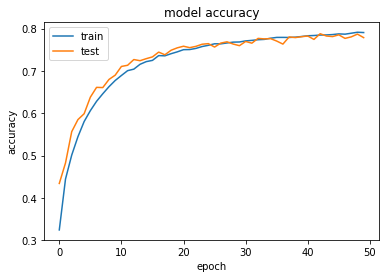

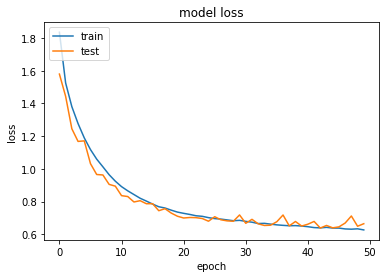

In [9]:
# list all data in history
print(historyFull.history.keys())

# summarize history for accuracy
plt.plot(historyFull.history['acc'])
plt.plot(historyFull.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(historyFull.history['loss'])
plt.plot(historyFull.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Training for subset

In [16]:
undersample_path = './Data/UnderSamples/'

In [15]:
x_train_sub = np.load(undersample_path + 'X0Prop0.1.npy')
y_train_sub = np.load(undersample_path + 'Y0Prop0.1.npy')
print('x_train_sub shape:', x_train_sub.shape)
print(x_train_sub.shape[0], 'train samples')

#Convert class vectors to binary class matrices.
y_train_sub = keras.utils.to_categorical(y_train_sub, num_classes)

FileNotFoundError: [Errno 2] No such file or directory: './Data/UnderSamples/X0Prop0.1.npy'

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train_sub = x_train_sub.astype('float32')
x_train_sub /= 255

historySub = model.fit(x_train_sub, y_train_sub, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

In [ ]:
# list all data in history
print(historySub.history.keys())
# summarize history for accuracy
plt.plot(historySub.history['accuracy'])
plt.plot(historySub.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historySub.history['loss'])
plt.plot(historySub.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()